# Exploratory Data Analysis using Python
## Movies
_by Virginia Herrero_

## Data collection
The Movie Database (TMDb) is a popular database for movies and TV shows. TMDb provides a web API in the form of so-called RESTful web service. In order to get access to the TMDb API, it is necessary to register in their website and generate an API key. The process is the following:

1. register at https://www.themoviedb.org/account/signup
2. after sucessful registration, go to setting > api
3. generate and memorize the API key

The TMDb API expects a movie ID. All movie IDs can be downloaded from their website as a compressed JSON file. To find more information about it, check the following link: https://developer.themoviedb.org/docs/daily-id-exports. This daily file export is only valid for approximately 3 months, so it is recommended to use the current date to avoid any problems when downloading the files. Note: the date format of the file is MONTH_DAY_YEAR.

To download the daily id export file, the urllib.request library is used. The compressed file is unzipped using gzip. This file is in binary format so it must be converted to text form using UTF-8, and finally save the content on the file in the variable content. 

In [ ]:
# Import all required libraries
import urllib.request
import gzip
import json

In [ ]:
# The API endpoint
url = "http://files.tmdb.org/p/exports/movie_ids_11_14_2024.json.gz"

In [ ]:
# Request to the API
request = urllib.request.Request(url, headers = {"Accept-Encoding": "gzip"})
# Response from the API
response = urllib.request.urlopen(request)
# Decompress the retrieve data
results = gzip.decompress(response.read())
# UTF-8 decoding
content = results.decode("utf-8")

Now, the daily id export file content is saved in the variable **content**. However, the daily id export file is not a valid JSON object, instead each line of this file is. Therefore, each line of the file must be initialized as a JSON object and add it to a list named **data**.

In [ ]:
# Initialize empty data list
data = []

# Iterate through all the lines of the variable content for the length of the file -1 since the last line is empty
for item in content.split("\n")[0:(len(content.split("\n"))-1)]:
    # Parse json object to python object
    parse_json = json.loads(item)
    # Append dictionary to the data list
    data.append(parse_json)

data

Loop through the first 10 rows of the list **data** to see the IDs from the first 10 movies.

In [ ]:
# Loop to obtain the 10 first movies IDs
for element in data[0:10]:
    print(element["id"])

Now the movie IDs and other information are stored in the list named **data**. To access and download all the information about the movies it is necessary to use the TMDb API. For this purpose use the python library TMDbSimple and initialize it with the API key. 

In [ ]:
import tmdbsimple as tmdb
tmdb.API_KEY = "4e6e31fe089f3cc86ad755423c61d3a7"

Loop through the first 10 movie IDs to take a look at the movie titles.

In [ ]:
# Loop to obtain the 10 first movies titles
for element in data[0:10]:
    print(element["original_title"])

Now all the information of the movies can be accessed with the library tmdbsimple and the TMDb API. The following loop can be used to output the individual keys that can be queried for a movie:

In [ ]:
# Create search class instance
search = tmdb.Search()
# Iterate through the 10 elements of the list data
for element in data[0:10]:
    response = search.movie(query = element["original_title"]) # Search movie by original title
    for result in search.results: # Iterate through the result of the search
        print(result["title"], result["id"], result["release_date"], result["popularity"]) # Print title, id, release data an popularity of each movie

Using the tmdbsimple library, create a new variable called **movies** where all the information of the **data** variable and the cast and crew information of all the movies is stored. 

Loop 1000 times over the following loop to obtained a movie dataset of 1000 items. All the data is stored in a json file named tmdb_movies.json

In [ ]:
# Initialize empty movies list
movies = []

# Loop though the elements of the list data
for element in data[0:1000]:
    # Create a movie class instance
    movie = tmdb.Movies(element["id"])
    response = movie.info() # Get all the primary info available of the movie
    movie_all_info = response.copy() # Create a copy of the dictionary
    response2 = movie.credits() # Get all the info from cast and crew of that movie
    movie_all_info.update(response2) # Add the dictionary containing cast and crew info to the one with the primary information
    movies.append(movie_all_info) # Add the dictionary with all the info to the list movies

movies

Create a file named tmdb_movies.json and store all the information of the variable **movies** in it to use it later as the dataset of this project. 

In [ ]:
movies # Python objects to store in the json file
tmdb_movies = open("tmdb_movies.json", "w")  # Open the json file where all the info from movies will be saved   
json.dump(movies, tmdb_movies)  # Parse python objects into json objects
tmdb_movies.close()  # Close the json file

## Data loading
Load the JSON file **tmdb_movies** as a pandas DataFrame.

Note: the json file to be loaded contains 30498 rows, which is a larger dataset than the one gathered in the data collection section. This larger data set was provided by HLSR Stuttgart. 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load dataset
df_movies = pd.read_json("tmdb_movies.json")

# Show first 5 lines
df_movies.head(5)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,"{'id': 177062, 'name': 'Blondie Collection', '...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",,3924,tt0029927,[US],en,...,70,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The favorite comic strip of millions at last o...,Blondie,False,7.1,8,"[{'adult': False, 'gender': 1, 'id': 34178, 'k...","[{'adult': False, 'gender': 0, 'id': 34170, 'k..."
1,False,None,None,0,"[{'id': 12, 'name': 'Adventure'}]",,6124,,[DE],de,...,420,[],Released,,"Peter Voss, Thief of Millions",False,0.0,0,"[{'adult': False, 'gender': 2, 'id': 48038, 'k...","[{'adult': False, 'gender': 2, 'id': 2902, 'kn..."
2,False,/uJlc4aNPF3Y8yAqahJTKBwgwPVW.jpg,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,8773,tt0055747,"[FR, IT, JP, PL]",fr,...,120,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,The Intimate Secrets of Young Lovers,Love at Twenty,False,6.7,48,"[{'adult': False, 'gender': 2, 'id': 1653, 'kn...","[{'adult': False, 'gender': 2, 'id': 2801, 'kn..."
3,False,None,"{'id': 425256, 'name': 'New World Disorder', '...",0,[],http://www.nwdfilms.com,25449,,[US],en,...,69,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,New World Disorder 9: Never Enough,False,6.0,3,"[{'adult': False, 'gender': 2, 'id': 84130, 'k...","[{'adult': False, 'gender': 0, 'id': 112786, '..."
4,False,None,None,0,"[{'id': 10751, 'name': 'Family'}]",,31975,tt1656746,[US],en,...,46,[],Released,,Sesame Street: Elmo Loves You!,True,0.0,0,[],[]


## Data cleaning
Clean and pre-process the data before it undergoes further analysis. Remove unnecessary columns, null values and convert data types.

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30498 entries, 0 to 30497
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  30498 non-null  bool   
 1   backdrop_path          18744 non-null  object 
 2   belongs_to_collection  1972 non-null   object 
 3   budget                 30498 non-null  int64  
 4   genres                 30498 non-null  object 
 5   homepage               3661 non-null   object 
 6   id                     30498 non-null  int64  
 7   imdb_id                30498 non-null  object 
 8   original_language      30498 non-null  object 
 9   original_title         30498 non-null  object 
 10  overview               30498 non-null  object 
 11  popularity             30498 non-null  float64
 12  poster_path            28891 non-null  object 
 13  production_companies   30498 non-null  object 
 14  production_countries   30498 non-null  object 
 15  re

* __Remove columns__

All columns or features that are not necessary for this analysis are dropped from the dataset.

In [ ]:
# Show all column names
df_movies.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [ ]:
# Drop selected columns
df_movies = df_movies.drop(columns = ["adult", "backdrop_path", "belongs_to_collection", "crew", "homepage", "id",
                                      "imdb_id", "original_language", "original_title", "overview", "poster_path", 
                                      "production_companies", "production_countries", "spoken_languages", "status", 
                                      "tagline", "video"])
df_movies.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast
0,10500000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",13.614,1982-06-11,792965326,115.0,E.T. the Extra-Terrestrial,7.4,5597,"[{'cast_id': 20, 'character': 'Elliott', 'cred..."
1,75000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",15.145,1996-06-25,0,145.0,Independence Day,6.8,4880,"[{'cast_id': 18, 'character': 'David Levinson'..."
2,63000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",28.268,1999-03-30,463517383,136.0,The Matrix,8.1,12879,"[{'cast_id': 34, 'character': 'Thomas A. Ander..."
3,150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",17.513,2003-05-15,738599701,138.0,The Matrix Reloaded,6.8,5037,"[{'cast_id': 24, 'character': 'Thomas A. Ander..."
4,150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",14.032,2003-11-05,424988211,129.0,The Matrix Revolutions,6.5,4537,"[{'cast_id': 1, 'character': 'Thomas A. Anders..."


* __Remove null values__

First, check the distribution of the numerical columns.

75% of the values in the budget and revenue column are null, therefore they will be removed from the datasest.

In [ ]:
# Get descriptive statistics
df_movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.049800e+04,30498.000000,3.049800e+04,25846.000000,30498.000000,30498.000000
mean,1.471807e+06,1.652612,3.822254e+06,88.170084,4.387835,54.887501
std,1.033231e+07,2.086308,4.000820e+07,40.961693,2.905961,422.898022
min,0.000000e+00,0.600000,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000e+00,0.600000,0.000000e+00,76.000000,0.000000,0.000000
50%,0.000000e+00,0.948000,0.000000e+00,90.000000,5.300000,2.000000
75%,0.000000e+00,1.529000,0.000000e+00,103.000000,6.500000,8.000000
max,2.800000e+08,49.125000,2.787965e+09,1100.000000,10.000000,16963.000000


In [ ]:
# Columns to replace zero values to nan values
replace_columns = ["budget", "revenue"]
# Replace zero for nan
df_movies[replace_columns] = df_movies[replace_columns].replace(0, np.nan)
# Drop nan values
df_movies = df_movies.dropna(subset = replace_columns)

Print the dataset shape, to check all null values were sucessfully removed. 

In [ ]:
df_movies.shape

(1389, 10)

* __Data types__

Convert object columns into datetime columns to be able to work with years in further analysis. 

In [ ]:
#  Convert string to datetime object
df_movies["release_date"] = pd.to_datetime(df_movies["release_date"])

In [ ]:
# Create a new column that shows the year of the datetime
df_movies["release_year"] = df_movies["release_date"].dt.year
df_movies.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
0,10500000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",13.614,1982-06-11,792965326.0,115.0,E.T. the Extra-Terrestrial,7.4,5597,"[{'cast_id': 20, 'character': 'Elliott', 'cred...",1982.0
2,63000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",28.268,1999-03-30,463517383.0,136.0,The Matrix,8.1,12879,"[{'cast_id': 34, 'character': 'Thomas A. Ander...",1999.0
3,150000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",17.513,2003-05-15,738599701.0,138.0,The Matrix Reloaded,6.8,5037,"[{'cast_id': 24, 'character': 'Thomas A. Ander...",2003.0
4,150000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",14.032,2003-11-05,424988211.0,129.0,The Matrix Revolutions,6.5,4537,"[{'cast_id': 1, 'character': 'Thomas A. Anders...",2003.0
5,31000000.0,"[{'id': 36, 'name': 'History'}, {'id': 10749, ...",5.921,1985-12-20,128499205.0,161.0,Out of Africa,7.2,497,"[{'cast_id': 22, 'character': 'Karen Christenc...",1985.0


In [ ]:
# Drop nan values from the release year column
df_movies = df_movies.dropna(subset = ["release_year"])
df_movies.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
0,10500000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",13.614,1982-06-11,792965326.0,115.0,E.T. the Extra-Terrestrial,7.4,5597,"[{'cast_id': 20, 'character': 'Elliott', 'cred...",1982.0
2,63000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",28.268,1999-03-30,463517383.0,136.0,The Matrix,8.1,12879,"[{'cast_id': 34, 'character': 'Thomas A. Ander...",1999.0
3,150000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",17.513,2003-05-15,738599701.0,138.0,The Matrix Reloaded,6.8,5037,"[{'cast_id': 24, 'character': 'Thomas A. Ander...",2003.0
4,150000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",14.032,2003-11-05,424988211.0,129.0,The Matrix Revolutions,6.5,4537,"[{'cast_id': 1, 'character': 'Thomas A. Anders...",2003.0
5,31000000.0,"[{'id': 36, 'name': 'History'}, {'id': 10749, ...",5.921,1985-12-20,128499205.0,161.0,Out of Africa,7.2,497,"[{'cast_id': 22, 'character': 'Karen Christenc...",1985.0


* __Flatten JSON data structures__

The columns genres and cast contain nested attributes, therefore it is necessary to “flatten” these columns so that the JSON document becomes a list that can be processed as usual. 

In [ ]:
def parse_col_json(column, key):
    """
    Flattens JSON structures within columns
    
    Parameter
    ----------
    column : str
        name of the column to flatten
    
    key : str
        name of the dictionary key to be flattened

    Returns
    -------
    None
    """
    for index, i in zip(df_movies.index, df_movies[column]):
        list1 = []
        for j in range(len(i)):
            list1.append((i[j][key]))
        df_movies.loc[index, column] = json.dumps(list1)

In [ ]:
parse_col_json("genres", "name")
parse_col_json("cast", "name")

**The clean dataset:**

In [ ]:
df_movies.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
0,10500000.0,"['Science Fiction', 'Adventure', 'Family', 'Fa...",13.614,1982-06-11,792965326.0,115.0,E.T. the Extra-Terrestrial,7.4,5597,"['Henry Thomas', 'Drew Barrymore', 'Robert Mac...",1982.0
2,63000000.0,"['Action', 'Science Fiction']",28.268,1999-03-30,463517383.0,136.0,The Matrix,8.1,12879,"['Keanu Reeves', 'Laurence Fishburne', 'Carrie...",1999.0
3,150000000.0,"['Adventure', 'Action', 'Thriller', 'Science F...",17.513,2003-05-15,738599701.0,138.0,The Matrix Reloaded,6.8,5037,"['Keanu Reeves', 'Carrie-Anne Moss', 'Laurence...",2003.0
4,150000000.0,"['Adventure', 'Action', 'Thriller', 'Science F...",14.032,2003-11-05,424988211.0,129.0,The Matrix Revolutions,6.5,4537,"['Keanu Reeves', 'Laurence Fishburne', 'Carrie...",2003.0
5,31000000.0,"['History', 'Romance', 'Drama']",5.921,1985-12-20,128499205.0,161.0,Out of Africa,7.2,497,"['Meryl Streep', 'Robert Redford', 'Klaus Mari...",1985.0


## Data exploration

In this section, an in-depth data exploratory analysis will be carried out.

### **Top 10 films with the highest revenue**

In [ ]:
df_movies.sort_values(by = "revenue", ascending = False)[0:10]

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
3062,237000000.0,"[""Action"", ""Adventure"", ""Fantasy"", ""Science Fi...",26.214,2009-12-10,2.787965e+09,162.0,Avatar,7.4,16963,"[""Sam Worthington"", ""Zoe Saldana"", ""Sigourney ...",2009.0
23056,245000000.0,"[""Action"", ""Adventure"", ""Science Fiction"", ""Fa...",25.882,2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,7.4,11616,"[""Harrison Ford"", ""Carrie Fisher"", ""Daisy Ridl...",2015.0
17677,280000000.0,"[""Action"", ""Adventure"", ""Science Fiction""]",38.856,2015-04-22,1.405404e+09,141.0,Avengers: Age of Ultron,7.3,11386,"[""Robert Downey Jr."", ""Chris Hemsworth"", ""Mark...",2015.0
18989,150000000.0,"[""Animation"", ""Adventure"", ""Family""]",31.355,2013-11-27,1.274219e+09,102.0,Frozen,7.3,8554,"[""Kristen Bell"", ""Idina Menzel"", ""Jonathan Gro...",2013.0
12333,200000000.0,"[""Action"", ""Adventure"", ""Science Fiction""]",20.764,2013-04-18,1.215440e+09,130.0,Iron Man 3,6.9,12511,"[""Robert Downey Jr."", ""Gwyneth Paltrow"", ""Don ...",2013.0
6133,195000000.0,"[""Action"", ""Science Fiction"", ""Adventure""]",3.359,2011-06-28,1.123747e+09,154.0,Transformers: Dark of the Moon,6.1,4501,"[""Shia LaBeouf"", ""John Malkovich"", ""Ken Jeong""...",2011.0
66,125000000.0,"[""Adventure"", ""Fantasy"", ""Family""]",45.157,2001-11-16,9.764756e+08,152.0,Harry Potter and the Philosopher's Stone,7.8,12120,"[""Daniel Radcliffe"", ""Rupert Grint"", ""Emma Wat...",2001.0
16950,76000000.0,"[""Animation"", ""Comedy"", ""Family""]",22.239,2013-06-25,9.707619e+08,98.0,Despicable Me 2,6.9,6640,"[""Steve Carell"", ""Kristen Wiig"", ""Benjamin Bra...",2013.0
70,150000000.0,"[""Adventure"", ""Fantasy"", ""Family"", ""Mystery""]",24.512,2007-06-28,9.382127e+08,138.0,Harry Potter and the Order of the Phoenix,7.6,9408,"[""Daniel Radcliffe"", ""Rupert Grint"", ""Emma Wat...",2007.0
131,250000000.0,"[""Adventure"", ""Fantasy"", ""Family""]",23.138,2009-07-07,9.339592e+08,153.0,Harry Potter and the Half-Blood Prince,7.6,9153,"[""Daniel Radcliffe"", ""Rupert Grint"", ""Emma Wat...",2009.0


### **Top 10 films with the highest budget**

In [ ]:
df_movies.sort_values(by = "budget", ascending = False)[0:10]

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
17677,280000000.0,"[""Action"", ""Adventure"", ""Science Fiction""]",38.856,2015-04-22,1.405404e+09,141.0,Avengers: Age of Ultron,7.3,11386,"[""Robert Downey Jr."", ""Chris Hemsworth"", ""Mark...",2015.0
205,270000000.0,"[""Adventure"", ""Fantasy"", ""Action"", ""Science Fi...",13.053,2006-06-28,3.910812e+08,154.0,Superman Returns,5.5,2089,"[""Brandon Routh"", ""Kevin Spacey"", ""Kate Boswor...",2006.0
8510,260000000.0,"[""Action"", ""Adventure"", ""Science Fiction""]",9.968,2012-03-07,2.841391e+08,132.0,John Carter,6.1,3006,"[""Taylor Kitsch"", ""Lynn Collins"", ""Samantha Mo...",2012.0
131,250000000.0,"[""Adventure"", ""Fantasy"", ""Family""]",23.138,2009-07-07,9.339592e+08,153.0,Harry Potter and the Half-Blood Prince,7.6,9153,"[""Daniel Radcliffe"", ""Rupert Grint"", ""Emma Wat...",2009.0
23056,245000000.0,"[""Action"", ""Adventure"", ""Science Fiction"", ""Fa...",25.882,2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,7.4,11616,"[""Harrison Ford"", ""Carrie Fisher"", ""Daisy Ridl...",2015.0
3062,237000000.0,"[""Action"", ""Adventure"", ""Fantasy"", ""Science Fi...",26.214,2009-12-10,2.787965e+09,162.0,Avatar,7.4,16963,"[""Sam Worthington"", ""Zoe Saldana"", ""Sigourney ...",2009.0
8503,225000000.0,"[""Action"", ""Adventure"", ""Fantasy"", ""Science Fi...",21.239,2013-06-12,6.680455e+08,143.0,Man of Steel,6.5,8922,"[""Henry Cavill"", ""Amy Adams"", ""Michael Shannon...",2013.0
5721,210000000.0,"[""Adventure"", ""Action"", ""Science Fiction"", ""Th...",0.883,2006-05-24,4.593596e+08,104.0,X-Men: The Last Stand,6.3,5255,"[""Hugh Jackman"", ""Halle Berry"", ""Ian McKellen""...",2006.0
3111,200000000.0,"[""Action"", ""Adventure"", ""Drama""]",13.583,2010-05-12,3.106695e+08,140.0,Robin Hood,6.3,2262,"[""Russell Crowe"", ""Cate Blanchett"", ""Max von S...",2010.0
12333,200000000.0,"[""Action"", ""Adventure"", ""Science Fiction""]",20.764,2013-04-18,1.215440e+09,130.0,Iron Man 3,6.9,12511,"[""Robert Downey Jr."", ""Gwyneth Paltrow"", ""Don ...",2013.0


### **The 10 most popular films**

In [ ]:
df_movies.sort_values(by = "popularity", ascending = False)[0:10]

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
20269,170000000.0,"[""Action"", ""Science Fiction"", ""Adventure""]",49.125,2014-07-30,7.733286e+08,121.0,Guardians of the Galaxy,7.9,15676,"[""Chris Pratt"", ""Zoe Saldana"", ""Dave Bautista""...",2014.0
66,125000000.0,"[""Adventure"", ""Fantasy"", ""Family""]",45.157,2001-11-16,9.764756e+08,152.0,Harry Potter and the Philosopher's Stone,7.8,12120,"[""Daniel Radcliffe"", ""Rupert Grint"", ""Emma Wat...",2001.0
272,3180000.0,"[""Drama"", ""Family"", ""Fantasy""]",41.709,1946-12-20,9.644124e+06,130.0,It's a Wonderful Life,8.2,1745,"[""James Stewart"", ""Donna Reed"", ""Lionel Barrym...",1946.0
17677,280000000.0,"[""Action"", ""Adventure"", ""Science Fiction""]",38.856,2015-04-22,1.405404e+09,141.0,Avengers: Age of Ultron,7.3,11386,"[""Robert Downey Jr."", ""Chris Hemsworth"", ""Mark...",2015.0
67,100000000.0,"[""Adventure"", ""Fantasy"", ""Family""]",33.245,2002-11-13,8.766885e+08,161.0,Harry Potter and the Chamber of Secrets,7.6,10205,"[""Daniel Radcliffe"", ""Rupert Grint"", ""Emma Wat...",2002.0
136,18000000.0,"[""Comedy"", ""Family"", ""Adventure"", ""Crime""]",32.347,1992-11-19,3.589917e+08,120.0,Home Alone 2: Lost in New York,6.4,4235,"[""Macaulay Culkin"", ""Joe Pesci"", ""Catherine O'...",1992.0
18989,150000000.0,"[""Animation"", ""Adventure"", ""Family""]",31.355,2013-11-27,1.274219e+09,102.0,Frozen,7.3,8554,"[""Kristen Bell"", ""Idina Menzel"", ""Jonathan Gro...",2013.0
27511,165000000.0,"[""Adventure"", ""Family"", ""Animation"", ""Action"",...",30.082,2014-10-24,6.578186e+08,102.0,Big Hero 6,7.8,9219,"[""Scott Adsit"", ""Ryan Potter"", ""Daniel Henney""...",2014.0
1102,40000000.0,"[""Adventure"", ""Action"", ""Comedy""]",29.357,2003-03-14,1.605830e+08,88.0,Johnny English,6.2,1471,"[""Rowan Atkinson"", ""John Malkovich"", ""Natalie ...",2003.0
2,63000000.0,"[""Action"", ""Science Fiction""]",28.268,1999-03-30,4.635174e+08,136.0,The Matrix,8.1,12879,"[""Keanu Reeves"", ""Laurence Fishburne"", ""Carrie...",1999.0


### **Top 5 best rated movies with at least 1000 ratings**

In [ ]:
# Filter new dt with at least 1000 ratings
df_movies_1000_ratings = df_movies.loc[df_movies["vote_count"] >= 1000]

# Top 5 best movies with at least 1000 ratings
df_movies_1000_ratings.sort_values(by = "vote_average", ascending = False)[0:5]

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
34,20000000.0,"[""Comedy"", ""Drama""]",14.066,1997-12-20,229400000.0,116.0,Life Is Beautiful,8.4,6309,"[""Roberto Benigni"", ""Nicoletta Braschi"", ""Gior...",1997.0
75,8000000.0,"[""Thriller"", ""Crime""]",24.191,1994-09-10,213928762.0,154.0,Pulp Fiction,8.4,13410,"[""John Travolta"", ""Samuel L. Jackson"", ""Uma Th...",1994.0
133,25000000.0,"[""Drama"", ""Crime""]",13.267,1990-09-12,46836394.0,145.0,GoodFellas,8.4,4927,"[""Ray Liotta"", ""Robert De Niro"", ""Joe Pesci"", ...",1990.0
511,1500000.0,"[""Drama"", ""Comedy""]",8.233,1936-02-05,8500000.0,87.0,Modern Times,8.3,1505,"[""Charlie Chaplin"", ""Paulette Goddard"", ""Henry...",1936.0
87,19000000.0,"[""Horror"", ""Thriller""]",16.599,1980-05-22,44017374.0,144.0,The Shining,8.2,7138,"[""Jack Nicholson"", ""Shelley Duvall"", ""Danny Ll...",1980.0


### **Top 5 worst rated movies with at least 1000 ratings**

In [ ]:
# Top 5 worst rated movies with at least 1000 ratings
df_movies_1000_ratings.sort_values(by = "vote_average", ascending = True)[0:5]

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
16198,6000000.0,"[""Comedy""]",9.268,2013-01-01,32438988.0,90.0,Movie 43,4.4,1190,"[""Anna Faris"", ""Emma Stone"", ""Halle Berry"", ""K...",2013.0
961,60000000.0,"[""Thriller"", ""Science Fiction""]",9.202,2008-06-11,163403799.0,91.0,The Happening,5.0,1514,"[""Mark Wahlberg"", ""Zooey Deschanel"", ""John Leg...",2008.0
8167,165000000.0,"[""Action"", ""Adventure"", ""Science Fiction""]",12.283,2016-06-22,389681935.0,120.0,Independence Day: Resurgence,5.0,3595,"[""Liam Hemsworth"", ""Jeff Goldblum"", ""Bill Pull...",2016.0
1098,78000000.0,"[""Fantasy"", ""Action"", ""Crime"", ""Science Fictio...",10.102,2003-02-14,179179718.0,103.0,Daredevil,5.1,2496,"[""Ben Affleck"", ""Jennifer Garner"", ""Colin Farr...",2003.0
8196,92000000.0,"[""Action"", ""Thriller""]",13.360,2013-02-06,304654182.0,98.0,A Good Day to Die Hard,5.2,4192,"[""Bruce Willis"", ""Jai Courtney"", ""Sebastian Ko...",2013.0


### **Best movies of the last 10 years with at least 1000 ratings**

In [ ]:
# Filter new dt with at least 1000 ratings
df_movies_1000_ratings = df_movies.loc[df_movies["vote_count"] >= 1000]

# Filter new dt with movies from the last 10 years
df_last_decade = df_movies_1000_ratings.loc[df_movies_1000_ratings["release_year"] >= 2007]

# Best movies in the last decade with at least 1000 ratings
df_last_decade.sort_values(by = "vote_average", ascending = False)[0:10]

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
23722,46000000.0,"[""Drama"", ""Thriller"", ""Crime""]",13.453,2013-09-18,122126687.0,153.0,Prisoners,8.0,5055,"[""Hugh Jackman"", ""Jake Gyllenhaal"", ""Paul Dano...",2013.0
12330,100000000.0,"[""Drama"", ""Western""]",16.647,2012-12-25,425368238.0,165.0,Django Unchained,8.0,14129,"[""Jamie Foxx"", ""Christoph Waltz"", ""Leonardo Di...",2012.0
4792,47000000.0,"[""Science Fiction"", ""Drama"", ""Romance"", ""Fanta...",9.495,2009-11-06,2331721.0,156.0,Mr. Nobody,7.9,2808,"[""Jared Leto"", ""Sarah Polley"", ""Diane Kruger"",...",2009.0
20269,170000000.0,"[""Action"", ""Science Fiction"", ""Adventure""]",49.125,2014-07-30,773328629.0,121.0,Guardians of the Galaxy,7.9,15676,"[""Chris Pratt"", ""Zoe Saldana"", ""Dave Bautista""...",2014.0
24485,23000000.0,"[""Romance"", ""Science Fiction"", ""Drama""]",15.150,2013-12-18,47351251.0,126.0,Her,7.9,6703,"[""Joaquin Phoenix"", ""Scarlett Johansson"", ""Amy...",2013.0
24537,13500000.0,"[""Drama"", ""Romance"", ""Crime"", ""Mystery""]",7.683,2013-01-01,19255873.0,124.0,The Best Offer,7.8,1240,"[""Geoffrey Rush"", ""Jim Sturgess"", ""Sylvia Hoek...",2013.0
27511,165000000.0,"[""Adventure"", ""Family"", ""Animation"", ""Action"",...",30.082,2014-10-24,657818612.0,102.0,Big Hero 6,7.8,9219,"[""Scott Adsit"", ""Ryan Potter"", ""Daniel Henney""...",2014.0
17343,38000000.0,"[""Drama"", ""Action""]",9.222,2013-09-02,90247624.0,123.0,Rush,7.7,3440,"[""Daniel Br\u00fchl"", ""Chris Hemsworth"", ""Oliv...",2013.0
70,150000000.0,"[""Adventure"", ""Fantasy"", ""Family"", ""Mystery""]",24.512,2007-06-28,938212738.0,138.0,Harry Potter and the Order of the Phoenix,7.6,9408,"[""Daniel Radcliffe"", ""Rupert Grint"", ""Emma Wat...",2007.0
131,250000000.0,"[""Adventure"", ""Fantasy"", ""Family""]",23.138,2009-07-07,933959197.0,153.0,Harry Potter and the Half-Blood Prince,7.6,9153,"[""Daniel Radcliffe"", ""Rupert Grint"", ""Emma Wat...",2009.0


### **Top 5 movie genres**

The gender column contains nested data structures, so it is not possible to count the genders. In order to solve the problem, the nested data structure need to be flatten out. In this way, each nested data element is added as a new row. The drawback of this procedure is that there is the risk of creating duplicate data.

In [ ]:
df_movies["genres"].value_counts()

genres
["Drama"]                                                             93
["Comedy"]                                                            75
["Drama", "Romance"]                                                  47
["Comedy", "Romance"]                                                 38
["Comedy", "Drama"]                                                   37
                                                                      ..
["Horror", "Thriller", "Drama"]                                        1
["Action", "Adventure", "Science Fiction", "Fantasy"]                  1
["History", "Animation", "Adventure"]                                  1
["Adventure", "Family", "Comedy", "Fantasy", "Music", "Animation"]     1
["Thriller", "Crime", "Action", "Comedy"]                              1
Name: count, Length: 550, dtype: int64

In [ ]:
df_movies.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year
0,10500000.0,"[""Science Fiction"", ""Adventure"", ""Family"", ""Fa...",13.614,1982-06-11,792965326.0,115.0,E.T. the Extra-Terrestrial,7.4,5597,"[""Henry Thomas"", ""Drew Barrymore"", ""Robert Mac...",1982.0
2,63000000.0,"[""Action"", ""Science Fiction""]",28.268,1999-03-30,463517383.0,136.0,The Matrix,8.1,12879,"[""Keanu Reeves"", ""Laurence Fishburne"", ""Carrie...",1999.0
3,150000000.0,"[""Adventure"", ""Action"", ""Thriller"", ""Science F...",17.513,2003-05-15,738599701.0,138.0,The Matrix Reloaded,6.8,5037,"[""Keanu Reeves"", ""Carrie-Anne Moss"", ""Laurence...",2003.0
4,150000000.0,"[""Adventure"", ""Action"", ""Thriller"", ""Science F...",14.032,2003-11-05,424988211.0,129.0,The Matrix Revolutions,6.5,4537,"[""Keanu Reeves"", ""Laurence Fishburne"", ""Carrie...",2003.0
5,31000000.0,"[""History"", ""Romance"", ""Drama""]",5.921,1985-12-20,128499205.0,161.0,Out of Africa,7.2,497,"[""Meryl Streep"", ""Robert Redford"", ""Klaus Mari...",1985.0


In [ ]:
# Initialize empty list
new_df = []

# Iterate over index and rows of a df
for index, row in df_movies.iterrows():
    # Iterate over the parsed json genres of the row
    for item in json.loads(row["genres"]):
        # Create a new column and add data
        row["genre"] = item
        # Add a copy of the row to the list
        new_df += [row.copy()]

df_movies = pd.DataFrame(new_df)
df_movies.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year,genre
0,10500000.0,"[""Science Fiction"", ""Adventure"", ""Family"", ""Fa...",13.614,1982-06-11,792965326.0,115.0,E.T. the Extra-Terrestrial,7.4,5597,"[""Henry Thomas"", ""Drew Barrymore"", ""Robert Mac...",1982.0,Science Fiction
0,10500000.0,"[""Science Fiction"", ""Adventure"", ""Family"", ""Fa...",13.614,1982-06-11,792965326.0,115.0,E.T. the Extra-Terrestrial,7.4,5597,"[""Henry Thomas"", ""Drew Barrymore"", ""Robert Mac...",1982.0,Adventure
0,10500000.0,"[""Science Fiction"", ""Adventure"", ""Family"", ""Fa...",13.614,1982-06-11,792965326.0,115.0,E.T. the Extra-Terrestrial,7.4,5597,"[""Henry Thomas"", ""Drew Barrymore"", ""Robert Mac...",1982.0,Family
0,10500000.0,"[""Science Fiction"", ""Adventure"", ""Family"", ""Fa...",13.614,1982-06-11,792965326.0,115.0,E.T. the Extra-Terrestrial,7.4,5597,"[""Henry Thomas"", ""Drew Barrymore"", ""Robert Mac...",1982.0,Fantasy
2,63000000.0,"[""Action"", ""Science Fiction""]",28.268,1999-03-30,463517383.0,136.0,The Matrix,8.1,12879,"[""Keanu Reeves"", ""Laurence Fishburne"", ""Carrie...",1999.0,Action


In [ ]:
# Show genre counts
df_movies["genre"].value_counts()

genre
Drama              646
Comedy             502
Action             370
Thriller           369
Romance            268
Adventure          243
Crime              220
Horror             178
Science Fiction    158
Family             140
Fantasy            134
Mystery            113
Animation           65
History             59
Music               58
War                 50
Western             20
Documentary         16
TV Movie             1
Name: count, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Movie genre distribution')

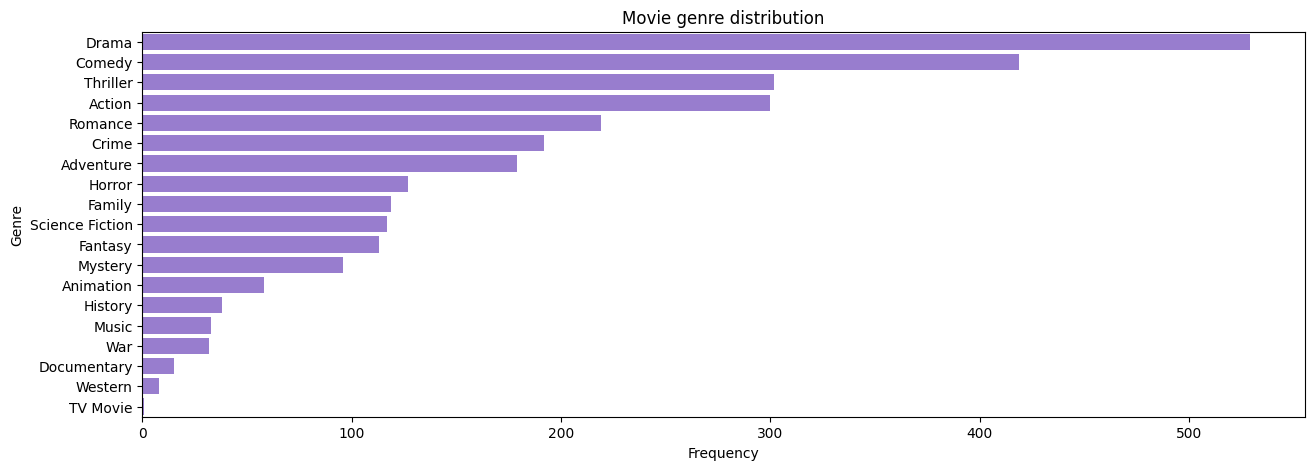

In [ ]:
count_genre = df_movies["genre"].value_counts()

count_genre_graph = plt.figure(figsize = (15, 5))
sns.barplot(x = count_genre.values, y = count_genre.index, color = "mediumpurple")
plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.title("Movie genre distribution", size = 12)

### **Movie ratings distribution**

First, calculate the average movie rating value. Later, plot the movie distribution including the average movie rating.

In [ ]:
# Show average rating
average_rating = df_movies["vote_average"].mean()
average_rating

np.float64(6.212437673130195)

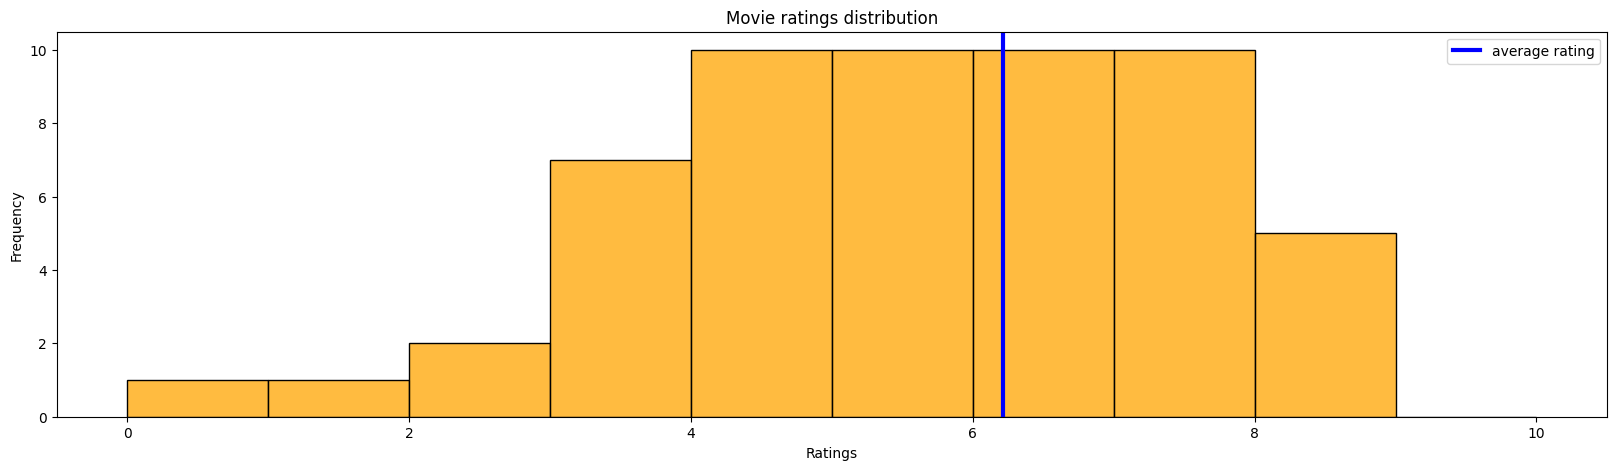

In [ ]:
count_ratings = df_movies["vote_average"].value_counts()

count_genre_graph = plt.figure(figsize = (20, 5))
ax = sns.histplot(data = count_ratings.index, bins = 10, binrange = (0,10), color = "orange")
ax.set(xlabel = "Ratings", ylabel = "Frequency")
plt.axvline(x = average_rating, linewidth = 3, color = "blue", label = "average rating")
plt.title("Movie ratings distribution", size = 12)
plt.legend()

### **Ratings per genre over the years**

Determine the average rating of genres per year between 1990 and 2018.

In [ ]:
# Filter movies between 1990 and 2018
df_movies = df_movies.loc[(df_movies["release_year"] >= 1990) & (df_movies["release_year"] < 2019)]
df_movies.head()

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,release_year,genre
2,63000000.0,"[""Action"", ""Science Fiction""]",28.268,1999-03-30,463517383.0,136.0,The Matrix,8.1,12879,"[""Keanu Reeves"", ""Laurence Fishburne"", ""Carrie...",1999.0,Action
2,63000000.0,"[""Action"", ""Science Fiction""]",28.268,1999-03-30,463517383.0,136.0,The Matrix,8.1,12879,"[""Keanu Reeves"", ""Laurence Fishburne"", ""Carrie...",1999.0,Science Fiction
3,150000000.0,"[""Adventure"", ""Action"", ""Thriller"", ""Science F...",17.513,2003-05-15,738599701.0,138.0,The Matrix Reloaded,6.8,5037,"[""Keanu Reeves"", ""Carrie-Anne Moss"", ""Laurence...",2003.0,Adventure
3,150000000.0,"[""Adventure"", ""Action"", ""Thriller"", ""Science F...",17.513,2003-05-15,738599701.0,138.0,The Matrix Reloaded,6.8,5037,"[""Keanu Reeves"", ""Carrie-Anne Moss"", ""Laurence...",2003.0,Action
3,150000000.0,"[""Adventure"", ""Action"", ""Thriller"", ""Science F...",17.513,2003-05-15,738599701.0,138.0,The Matrix Reloaded,6.8,5037,"[""Keanu Reeves"", ""Carrie-Anne Moss"", ""Laurence...",2003.0,Thriller


Create a pivot table to have the relationships between genre, release year and average rating.

In [ ]:
# Pivot table genre, release year and average rating
ratings_per_genre_per_year = pd.pivot_table(df_movies, values = ["vote_average"], index = "genre", columns = ["release_year"])
ratings_per_genre_per_year

vote_average                                          \
release_year          1990.0    1991.0    1992.0    1993.0    1994.0   
genre                                                                  
Action              6.142857  5.770000  5.980000  6.137500  6.466667   
Adventure           6.300000  5.983333  5.750000  6.183333  6.100000   
Animation           6.600000       NaN  5.000000  7.100000  6.400000   
Comedy              6.280000  5.758333  5.881818  6.137500  6.212500   
Crime               6.500000  6.485714  6.625000  6.300000  6.800000   
Documentary              NaN       NaN       NaN       NaN  7.900000   
Drama               6.177778  6.408333  6.800000  6.760000  6.960000   
Family              6.766667  5.900000  5.633333  6.875000  5.650000   
Fantasy             6.250000  5.300000  5.550000  7.000000  6.775000   
History                  NaN       NaN  6.100000  7.500000       NaN   
Horror              6.085714  5.600000  6.333333  5.275000  5.850000   
Music                    NaN  4.300000  6.400000  6.200000       NaN   
Mystery             6.420000  6.140000  6.033333  6.550000  6.500000   
Romance                  NaN  5.100000  5.900000  7.050000  5.966667   
Science Fiction     6.100000  5.725000  5.000000  5.200000  6.350000   
TV Movie                 NaN       NaN       NaN       NaN       NaN   
Thriller            6.200000  6.428571  6.083333  5.862500  6.425000   
War                      NaN  6.500000       NaN       NaN  6.000000   
Western                  NaN  6.400000       NaN  7.500000       NaN   

                                                                   ...  \
release_year       1995.0    1996.0    1997.0    1998.0    1999.0  ...   
genre                                                              ...   
Action           5.866667  6.433333  5.870000  5.900000  6.022222  ...   
Adventure        6.075000  5.800000  6.180000  5.966667  6.166667  ...   
Animation             NaN  6.600000  7.166667  6.325000  7.450000  ...   
Comedy           6.287500  5.988889  6.156250  6.269565  6.066667  ...   
Crime            7.233333  7.075000  6.025000  6.775000  6.572727  ...   
Documentary           NaN       NaN       NaN       NaN  7.900000  ...   
Drama            6.841667  6.540000  6.487500  6.792000  6.192000  ...   
Family           6.100000  5.700000  5.950000  5.450000  5.800000  ...   
Fantasy          6.250000  5.200000  6.300000  6.340000  5.200000  ...   
History               NaN  6.300000  6.900000  7.300000  6.300000  ...   
Horror           6.400000  5.666667  5.575000  5.660000  5.160000  ...   
Music            7.500000  5.100000  6.500000  7.550000  7.100000  ...   
Mystery          6.050000  6.700000  6.916667  6.275000  6.600000  ...   
Romance          6.169231  6.600000  6.700000  6.741667  5.988889  ...   
Science Fiction  5.500000  5.500000  6.400000  5.600000  5.657143  ...   
TV Movie              NaN       NaN       NaN       NaN       NaN  ...   
Thriller         6.160000  6.280000  6.120000  6.385714  6.211111  ...   
War              6.500000       NaN       NaN  6.933333  6.350000  ...   
Western               NaN       NaN       NaN  5.600000  6.600000  ...   

                                                                             \
release_year       2008.0    2009.0    2010.0    2011.0    2012.0    2013.0   
genre                                                                         
Action           5.600000  6.050000  5.914286  6.179167  6.155000  6.445000   
Adventure        5.918182  6.844444  5.666667  6.000000  5.880000  6.515385   
Animation        5.650000  3.800000  5.400000  6.250000  6.500000  6.550000   
Comedy           5.863636  6.064000  5.693103  5.875862  5.581818  6.260000   
Crime            5.425000  5.662500  6.072727  6.130769  6.222222  6.421429   
Documentary           NaN       NaN  6.740000       NaN  7.200000  7.400000   
Drama            6.200000  6.160000  6.212821  6.405714  6.552632  6.633333   
Family      

### **Revenue per genre over the years**

Create a new pivot table that contains the revenue, genre and release year information.

In [ ]:
# Pivot table genre, release year and revenue
revenue_per_genre_per_year = pd.pivot_table(df_movies, values = ["revenue"], index = "genre", columns = ["release_year"])
revenue_per_genre_per_year

revenue                                            \
release_year           1990.0        1991.0        1992.0        1993.0   
genre                                                                     
Action           8.875395e+07  6.238896e+07  9.556482e+07  9.000031e+07   
Adventure        9.837088e+07  6.359038e+07  1.118409e+08  9.691429e+07   
Animation        4.743146e+07           NaN  1.411059e+07  4.110823e+07   
Comedy           1.462248e+08  4.908764e+07  5.678485e+07  8.488788e+07   
Crime            5.156633e+07  6.128528e+07  1.118348e+08  1.105206e+08   
Documentary               NaN           NaN           NaN           NaN   
Drama            2.494630e+07  5.507973e+07  7.651087e+07  7.007579e+07   
Family           2.420387e+08  3.722175e+07  1.467241e+08  1.652003e+08   
Fantasy          3.187802e+07  8.815380e+06  1.242350e+07  1.064664e+08   
History                   NaN           NaN  7.191399e+06  5.650506e+07   
Horror           2.247078e+07  2.056026e+07  1.421980e+07  8.883758e+06   
Music                     NaN  1.193062e+06  4.110067e+08  5.731903e+07   
Mystery          5.890904e+07  2.771385e+07  2.386195e+07  1.897435e+08   
Romance                   NaN  2.657770e+07  2.405534e+08  3.757130e+07   
Science Fiction  7.167674e+07  3.940769e+07  5.866245e+07  5.562539e+06   
TV Movie                  NaN           NaN           NaN           NaN   
Thriller         7.467452e+07  4.918508e+07  1.010300e+08  8.181212e+07   
War                       NaN  1.810962e+08           NaN           NaN   
Western                   NaN  1.790338e+08           NaN  5.650506e+07   

                                                                         \
release_year           1994.0        1995.0        1996.0        1997.0   
genre                                                                     
Action           4.369414e+07  1.045793e+08  2.140925e+08  1.435847e+08   
Adventure        7.690013e+06  1.323084e+08  2.054802e+08  2.557908e+08   
Animation        1.367069e+07           NaN  2.502000e+08  1.320277e+08   
Comedy           6.594186e+07  4.140283e+07  4.297630e+07  1.225596e+08   
Crime            8.367040e+07  2.293504e+07  4.187106e+07  5.247608e+07   
Documentary      7.830611e+06           NaN           NaN           NaN   
Drama            1.442996e+08  5.254994e+07  6.446270e+07  5.204851e+07   
Family           6.105102e+07  2.541349e+08  9.943107e+07  1.068187e+08   
Fantasy          1.155845e+08  1.270675e+08  1.757074e+07  1.702761e+08   
History                   NaN           NaN  1.332314e+07  7.400000e+07   
Horror           1.167148e+08  1.600000e+01  1.603721e+07  4.102156e+07   
Music                     NaN  1.400000e+07  4.619014e+06  3.566637e+06   
Mystery          1.072174e+08  1.146156e+07  6.062130e+07  5.930213e+07   
Romance          1.583795e+08  2.402279e+07  1.390074e+07  6.443749e+07   
Science Fiction  6.283849e+07  1.134935e+08  3.764799e+07  2.010515e+08   
TV Movie                  NaN           NaN           NaN           NaN   
Thriller         7.895117e+07  8.025154e+07  5.714469e+07  6.836573e+07   
War              2.433232e+07  1.500000e+07           NaN           NaN   
Western                   NaN           NaN           NaN           NaN   

                                             ...                              \
release_year           1998.0        1999.0  ...        2008.0        2009.0   
genre                                        ...                               
Action           7.278860e+07  1.097409e+08  ...  1.034401e+08  2.213723e+08   
Adventure        7.947090e+07  1.288410e+08  ...  1.310755e+08  5.944605e+08   
Animation        1.328665e+08  5.088380e+07  ...  1.820768e+08  2.398551e+07   
Comedy           7.468844e+07  3.198408e+07  ...  1.070518e+08  6.092340e+07   
Crime            3.347276e+07  7.860123e+07  ...  3.705248e+07  1.591757e+07   
Documentary               NaN  5.000000e+05  ...           NaN           NaN   
